# Homework 3: Functions and Visualizations

First, set up the imports by running the cell below.

In [0]:
import numpy as np
import pandas as pd

# These lines set up graphing capabilities (may not be needed).
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

## Canadian Public Employees' Incomes

We'll look at the 2016 compensation of Ontario Canada public sector employees who made more than CAN$100,000 in 2016. The database is 17MB as a CSV file.

First read in the dataset. It may take a little bit to load (though much faster than Excel).

In [2]:
income = pd.read_csv('https://raw.githubusercontent.com/LGKerby/Python/master/en-2016-pssd-compendium.csv')
income.head()

,Sector,Last Name,First Name,Salary Paid,Taxable Benefits,Employer,Job Title,Calendar Year
0,Colleges,Abbas,Sadiq,"$105,595.39",$84.24,Algonquin College,Professor,2016
1,Colleges,Abboud,Nadim,"$108,393.10",$126.96,Algonquin College,Professor,2016
2,Colleges,Agate,Jeffery M.,"$125,779.64",$325.58,Algonquin College,"Associate Director, Student Support Services",2016
3,Colleges,Al-Azzawi,Abdul,"$105,595.41",$84.24,Algonquin College,Professor,2016
4,Colleges,Alexander,Doug,"$105,595.41",$126.96,Algonquin College,Professor,2016


**Question 1**<br/>
How many rows (ie employees) are in the dataset?

In [3]:
len(income)

124445

**Question 2** <br/> Add a new column called '2016 Salary ($)' that contains employee pay as a number, to the DataFrame `income`.

*Hint:* This will require stripping the '$' off of the 'Salary Paid' column elements and converting them from a string to a float. <br/>
*Second Hint:* This will also require creating a function (or using a lambda) to do this, and applying it to the 'Salary Paid' column. <br/>
*Third Hint:* Don't forget you will also have to remove the comma.

In [40]:
income['2016 Salary ($)'] = income['Salary Paid'].apply(lambda string : float(string.strip('$').replace(',','')))
income.head()

,Sector,Last Name,First Name,Salary Paid,Taxable Benefits,Employer,Job Title,Calendar Year,2016 Salary ($)
0,Colleges,Abbas,Sadiq,"$105,595.39",$84.24,Algonquin College,Professor,2016,105595.39
1,Colleges,Abboud,Nadim,"$108,393.10",$126.96,Algonquin College,Professor,2016,108393.10
2,Colleges,Agate,Jeffery M.,"$125,779.64",$325.58,Algonquin College,"Associate Director, Student Support Services",2016,125779.64
3,Colleges,Al-Azzawi,Abdul,"$105,595.41",$84.24,Algonquin College,Professor,2016,105595.41
4,Colleges,Alexander,Doug,"$105,595.41",$126.96,Algonquin College,Professor,2016,105595.41


**Question 3**<br/>
What is the average employee salary in this dataset?

In [8]:
np.mean(income['2016 Salary ($)'])

127251.60404291407

**Question 4**<br/>
Create a histogram using the `pandas` method `hist` (true, it uses `matplotlib` under the hood, but you don't really see this), of employee salary. Use 100 bins.

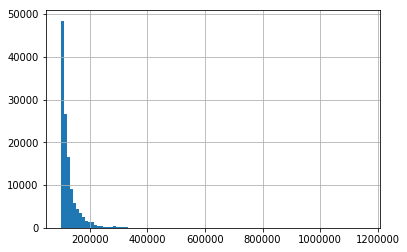

In [9]:
income['2016 Salary ($)'].hist(bins=100)

**Question 5** <br/>
How many employees made more than CAN$200,000? Use python to calculate this (not by counting on the histogram).

In [15]:
len(income[income['2016 Salary ($)'] > 200000])
 


5512

**Question 6**<br/>
What was the maximum salary in the dataset?

In [17]:
maximum = max(income['2016 Salary ($)'])
maximum

1155899.14

**Question 7**<br/>
Who made that max salary?<br/>
Use `loc` and put the answer into one string: 'firstname lastname'

*Hint:* First find the row/index for that max salary.

In [21]:
first_name = income[income['2016 Salary ($)'] == maximum].iloc[0,2]
last_name = income[income['2016 Salary ($)'] == maximum].iloc[0,1]
full_name = first_name + " " + last_name
full_name

'Jeffrey Lyash'

**Question 8** <br/> What Job Title was most common?

*Hint:* Use the method `describe()` on a DataFrame column. You will see summary information, which you can separate by adding another method (ie to find the frequency of the most common Job Title you would code `income['Job Title'].describe().freq`).

In [23]:
income['Job Title'].describe().top

'Professor'

**Question 9**<br/>
How many different Employers are included in the dataset?

*Hint:* The method `nunique()` on a DataFrame column (ie a pandas Series) returns the number of unique values. As an aside, the method `unique` returns an array of what those unique values are (try it if you want).

In [24]:
income['Employer'].nunique()

1788

**Question 10**<br/> 
How many employees did the University of Waterloo have in this dataset? Again use python to give the answer as a number.

In [29]:
uow = income[income['Employer'] == 'University of Waterloo']
len(uow)

1357

**Question 11**<br/>
What was the average employee salary of the University of Waterloo in this dataset?

In [30]:
uow['2016 Salary ($)'].mean()

150572.18347089156

**Question 12**<br/>
Create a histogram of employee salary of University of Waterloo employees, using 50 bins.

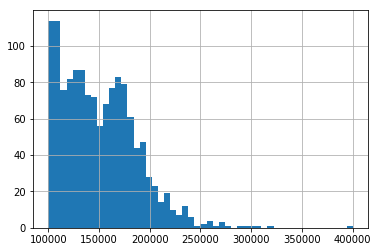

In [31]:
uow['2016 Salary ($)'].hist(bins=50)

**Question 13**<br/>
How many 'Professor'-s making more than CAN$100,000/yr are employed at the University of Waterloo?

In [41]:
greater_than_100000 = uow[uow['2016 Salary ($)'] > 100000]
greater_than_100000_and_Professor = greater_than_100000[uow['Job Title'] == 'Professor']
len(greater_than_100000_and_Professor)

428

**Question 14**<br/>
Create a histogram of University of Waterloo 'Professor'-s, using 50 bins.

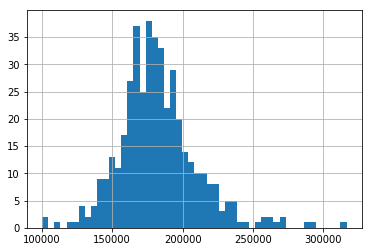

In [46]:
Professor = uow[uow['Job Title'] == 'Professor']
Professor['2016 Salary ($)'].hist(bins=50)

**Question 15**<br/>
How many professors of any type (contains 'Prof') are making more than CAN$100,000 at the University of Waterloo?

In [44]:
greater_than_100000_and_Prof = greater_than_100000[uow['Job Title'].str.contains('Prof', regex=True)]
len(greater_than_100000_and_Prof)

967

**Question 16**<br/>
Plot a histogram of these professors (contains 'Prof'), using 50 bins.

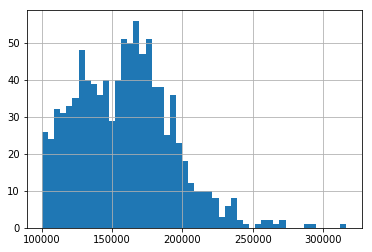

In [45]:
greater_than_100000_and_Prof['2016 Salary ($)'].hist(bins=50)